<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Checks" data-toc-modified-id="Checks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checks</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#MLR" data-toc-modified-id="MLR-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>MLR</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Performance" data-toc-modified-id="Performance-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Prepocessing of ML data

# Var

In [1]:
base_dir = '/ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/HUBIF-TUK-CAM-KOR/function_db-ref/'
work_dir = file.path(base_dir, 'ML')
cophylo_eff_file = file.path(base_dir, 'cophylo_effect-size.tsv')
feat_file = file.path(base_dir, 'cophylo_genome_features.tsv')

# params
threads = 12
seed = 9382

# Init

In [5]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)
Init()

In [6]:
library(Boruta)
library(mlr)
library(randomForest)
library(parallelMap)

In [7]:
setDTthreads(threads)
set.seed(seed)
make_dir(work_dir)
df.dims()

Directory already exists: /ebio/abt3_projects/HUBIF_metagenomics/data/pipelines/llg/cophyverttrans/batch2_clusters1-3/round6/HUBIF-TUK-CAM-KOR/function_db-ref//ML 


In [8]:
# custom boruta filter
mlr_boruta_filter()

Filter: 'boruta.filter'
Packages: ''
Supported tasks: classif,regr
Supported features: numerics,factors,ordered

# Load

In [9]:
cophylo_eff = Fread(cophylo_eff_file) %>%
    mutate.(Taxa = gsub('^s__', '', Taxa)) %>%
    rename.('Species' = Taxa)
cophylo_eff

Species,Paco_Cons_effectsize,Paco_Best_effectsize,Parafit_Cons_effectsize,Parafit_Best_effectsize,Phytools_Cons_effectsize,Phytools_Best_effectsize,Paco_Cons_effectsize_zscore,Paco_Best_effectsize_zscore,Parafit_Cons_effectsize_zscore,Parafit_Best_effectsize_zscore,Phytools_Cons_effectsize_zscore,Phytools_Best_effectsize_zscore,Paco_Cons_pvalue,Paco_Best_pvalue,Parafit_Cons_pvalue,Parafit_Best_pvalue,Phytools_Cons_pvalue,Phytools_Best_pvalue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Akkermansia_muciniphila,0.002735124,0.002151911,0.5943670,0.3121917,-1.80632e-04,0.006012140,-0.6174458,-0.8097915,1.31175574,-0.3046682,-0.4514548,0.4304204,0.127,0.196,0.035,0.130,1,0.206
Alistipes_finegoldii,0.011100678,-0.001015532,0.2509558,-0.1314011,-7.50778e-05,-0.000829298,2.1990449,-1.0364729,0.07619135,-1.6507953,-0.4431177,-1.1607124,0.001,0.608,0.048,0.803,1,1.000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Ruminococcus_lactaris,0.007456366,0.01752171,0.4954050,0.6095306,-0.000122711,-0.001852365,0.9720884,0.2901641,0.95569876,0.5976364,-0.4468799,-1.3986501,0.003,0.018,0.025,0.001,1,1.000
Ruminococcus_torques,0.003375716,0.01867796,0.2363205,0.3292434,-0.000269984,0.001976354,-0.4017731,0.3729124,0.02353484,-0.2529231,-0.4585122,-0.5081939,0.091,0.001,0.014,0.009,1,0.228


In [10]:
# features
feats = Fread(feat_file) %>%
    as.data.frame
feats

Genome,species,ncbi_taxid,strain,dl_species,Fasta,Completeness,Contamination,Strain_heterogeneity,Genome_size__bp,⋯,num_genes_KO.K17686,num_genes_KO.K17758,num_genes_KO.K17759,num_genes_KO.K17828,num_genes_KO.K18682,num_genes_KO.K18707,num_genes_KO.K19302,num_genes_KO.K21071,num_genes_KO.K21636,num_genes_KO.K22132
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GCA_000431575_1,Firmicutes_bacterium_CAG_83,1262992,CAG:83,Firmicutes bacterium CAG:83,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/genbank/bacteria/Firmicutes/bacterium/CAG:83/GCA_000431575.1_MGS83_genomic.fna.gz,91.23,0.67,0,1866939,⋯,1,1,1,1,1,1,1,1,1,1
GCA_000432435_1,Eubacterium_sp_CAG_180,1262882,CAG:180,Eubacterium sp. CAG:180,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/genbank/bacteria/Eubacterium/sp./CAG:180/GCA_000432435.1_MGS180_genomic.fna.gz,97.99,0.34,0,1882175,⋯,1,1,1,1,1,1,0,0,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCF_019645995_1,Escherichia_coli,562,XL1-Blue,Escherichia coli,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/refseq/bacteria/Escherichia/coli/XL1-Blue/GCF_019645995.1_ASM1964599v1_genomic.fna.gz,99.97,0.04,0,4663358,⋯,1,1,1,0,0,0,1,0,1,1
GCF_904711265_1,Escherichia_coli,562,Quinolone resistant,Escherichia coli,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/refseq/bacteria/Escherichia/coli/Quinolone_resistant/GCF_904711265.1_2014-01-7375_genomic.fna.gz,99.97,0.04,0,5270466,⋯,1,1,1,0,0,0,1,0,2,1


In [11]:
# filtering out KEGG features
to_rm = grepl('^num_genes_KEGG', colnames(feats))
feats = as.data.frame(feats[,!to_rm])
feats

Genome,species,ncbi_taxid,strain,dl_species,Fasta,Completeness,Contamination,Strain_heterogeneity,Genome_size__bp,⋯,num_genes_KO.K17686,num_genes_KO.K17758,num_genes_KO.K17759,num_genes_KO.K17828,num_genes_KO.K18682,num_genes_KO.K18707,num_genes_KO.K19302,num_genes_KO.K21071,num_genes_KO.K21636,num_genes_KO.K22132
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GCA_000431575_1,Firmicutes_bacterium_CAG_83,1262992,CAG:83,Firmicutes bacterium CAG:83,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/genbank/bacteria/Firmicutes/bacterium/CAG:83/GCA_000431575.1_MGS83_genomic.fna.gz,91.23,0.67,0,1866939,⋯,1,1,1,1,1,1,1,1,1,1
GCA_000432435_1,Eubacterium_sp_CAG_180,1262882,CAG:180,Eubacterium sp. CAG:180,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/genbank/bacteria/Eubacterium/sp./CAG:180/GCA_000432435.1_MGS180_genomic.fna.gz,97.99,0.34,0,1882175,⋯,1,1,1,1,1,1,0,0,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCF_019645995_1,Escherichia_coli,562,XL1-Blue,Escherichia coli,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/refseq/bacteria/Escherichia/coli/XL1-Blue/GCF_019645995.1_ASM1964599v1_genomic.fna.gz,99.97,0.04,0,4663358,⋯,1,1,1,0,0,0,1,0,1,1
GCF_904711265_1,Escherichia_coli,562,Quinolone resistant,Escherichia coli,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/refseq/bacteria/Escherichia/coli/Quinolone_resistant/GCF_904711265.1_2014-01-7375_genomic.fna.gz,99.97,0.04,0,5270466,⋯,1,1,1,0,0,0,1,0,2,1


In [12]:
# filtering out KO features
to_rm = grepl('^num_genes_KO', colnames(feats))
feats = as.data.table(feats[,!to_rm])
feats

Genome,species,ncbi_taxid,strain,dl_species,Fasta,Completeness,Contamination,Strain_heterogeneity,Genome_size__bp,⋯,num_genes_COG.N,num_genes_COG.O,num_genes_COG.P,num_genes_COG.Q,num_genes_COG.S,num_genes_COG.T,num_genes_COG.U,num_genes_COG.V,num_genes_COG.W,num_genes_COG.Z
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GCA_000431575_1,Firmicutes_bacterium_CAG_83,1262992,CAG:83,Firmicutes bacterium CAG:83,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/genbank/bacteria/Firmicutes/bacterium/CAG:83/GCA_000431575.1_MGS83_genomic.fna.gz,91.23,0.67,0,1866939,⋯,13,46,91,19,333,60,34,31,0,0
GCA_000432435_1,Eubacterium_sp_CAG_180,1262882,CAG:180,Eubacterium sp. CAG:180,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/genbank/bacteria/Eubacterium/sp./CAG:180/GCA_000432435.1_MGS180_genomic.fna.gz,97.99,0.34,0,1882175,⋯,3,41,55,8,338,44,25,33,0,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCF_019645995_1,Escherichia_coli,562,XL1-Blue,Escherichia coli,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/refseq/bacteria/Escherichia/coli/XL1-Blue/GCF_019645995.1_ASM1964599v1_genomic.fna.gz,99.97,0.04,0,4663358,⋯,118,132,362,62,865,124,173,37,0,0
GCF_904711265_1,Escherichia_coli,562,Quinolone resistant,Escherichia coli,/ebio/abt3_projects/temp_data/nyoungblut/cophylo_genomes//genome_dl/human_readable/refseq/bacteria/Escherichia/coli/Quinolone_resistant/GCF_904711265.1_2014-01-7375_genomic.fna.gz,99.97,0.04,0,5270466,⋯,138,141,364,74,1079,133,211,42,1,0


## Checks

In [13]:
overlap(feats$species, cophylo_eff$Species)

intersect(x,y): 59 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 59 


# Preprocessing

In [14]:
# features to wide variable
feats_f = feats %>%
    select.(-species, -ncbi_taxid, -strain, -dl_species, -Fasta) %>%
    as.data.frame
rownames(feats_f) = feats_f$Genome
feats_f$Genome = NULL
feats_f

,Completeness,Contamination,Strain_heterogeneity,Genome_size__bp,GC,Num_contigs,N50__contigs,Coding_density,Num_predicted_genes,Acetate.utilization,⋯,num_genes_COG.N,num_genes_COG.O,num_genes_COG.P,num_genes_COG.Q,num_genes_COG.S,num_genes_COG.T,num_genes_COG.U,num_genes_COG.V,num_genes_COG.W,num_genes_COG.Z
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GCA_000431575_1,91.23,0.67,0,1866939,60.7,214,16765,87.07,1807,0,⋯,13,46,91,19,333,60,34,31,0,0
GCA_000432435_1,97.99,0.34,0,1882175,44.5,75,46269,89.67,1783,0,⋯,3,41,55,8,338,44,25,33,0,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCF_019645995_1,99.97,0.04,0,4663358,50.7,1,4663358,87.73,4374,0,⋯,118,132,362,62,865,124,173,37,0,0
GCF_904711265_1,99.97,0.04,0,5270466,50.6,5,4998981,87.54,5016,0,⋯,138,141,364,74,1079,133,211,42,1,0


In [20]:
# target variable
pred = cophylo_eff %>%    
    right_join(feats %>% select.(Genome, species),
               c('Species'='species')) %>%
    select.(Genome, Species, Paco_Best_pvalue) %>%
    mutate.(Paco_Best_pvalue = Paco_Best_pvalue %>% as.Num,
            Paco_Best_pvalue = p.adjust(Paco_Best_pvalue, method='BH')) %>%
    rename.('Y' = Paco_Best_pvalue) %>%
    mutate.(Y = ifelse(Y < 0.01, 'cophylo', 'no_cophylo')) %>%
    as.data.frame
rownames(pred) = pred$Genome
pred$Genome = NULL

pred$Y %>% table
pred = pred[rownames(feats_f),,drop=FALSE]
pred

.
   cophylo no_cophylo 
       207        288 

,Species,Y
,<chr>,<chr>
GCA_000431575_1,Firmicutes_bacterium_CAG_83,no_cophylo
GCA_000432435_1,Eubacterium_sp_CAG_180,cophylo
⋮,⋮,⋮
GCF_019645995_1,Escherichia_coli,no_cophylo
GCF_904711265_1,Escherichia_coli,no_cophylo


In [21]:
# merging
feats_f = cbind(pred, feats_f)
feats_f

,Species,Y,Completeness,Contamination,Strain_heterogeneity,Genome_size__bp,GC,Num_contigs,N50__contigs,Coding_density,⋯,num_genes_COG.N,num_genes_COG.O,num_genes_COG.P,num_genes_COG.Q,num_genes_COG.S,num_genes_COG.T,num_genes_COG.U,num_genes_COG.V,num_genes_COG.W,num_genes_COG.Z
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GCA_000431575_1,Firmicutes_bacterium_CAG_83,no_cophylo,91.23,0.67,0,1866939,60.7,214,16765,87.07,⋯,13,46,91,19,333,60,34,31,0,0
GCA_000432435_1,Eubacterium_sp_CAG_180,cophylo,97.99,0.34,0,1882175,44.5,75,46269,89.67,⋯,3,41,55,8,338,44,25,33,0,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCF_019645995_1,Escherichia_coli,no_cophylo,99.97,0.04,0,4663358,50.7,1,4663358,87.73,⋯,118,132,362,62,865,124,173,37,0,0
GCF_904711265_1,Escherichia_coli,no_cophylo,99.97,0.04,0,5270466,50.6,5,4998981,87.54,⋯,138,141,364,74,1079,133,211,42,1,0


In [22]:
# checking for NAs
feats_f %>%
    apply(2, function(x) any(is.na(x))) %>% 
    as.data.frame %>%
    filter(`.` == TRUE)

.
<lgl>


# MLR

In [23]:
# params
target = 'Y'
measures = list(auc, f1)
cv_iters = 5
cons_feat_rate = 0.1

In [24]:
# creating mlr task
tsk = makeClassifTask(data = feats_f[,2:ncol(feats_f)], 
                      target = target,
                      blocking = gsub('_.+', '', feats_f$Species) %>% as.factor)
tsk

Supervised task: feats_f[, 2:ncol(feats_f)]
Type: classif
Target: Y
Observations: 495
Features:
   numerics     factors     ordered functionals 
        133           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
   cophylo no_cophylo 
       207        288 
Positive class: cophylo

In [25]:
# removing constant features
tsk = removeConstantFeatures(tsk, perc = cons_feat_rate)
tsk

Removing 35 columns: Strain_heterogeneity,Aerobe,Anaerobe,Beta.hemolysis,Cellobiose,D.Sorbitol,Facultative,Glucose.fermenter,Growth.in.KCN,Growth.on.MacConkey.agar,Growth.on.ordinary.blood.agar,Lipase,Malonate,Methyl.red,Nitrate.to.nitrite,Ornithine.decarboxylase,Oxidase,Spore.formation,Urea.hydrolysis,Voges.Proskauer,Yellow.pigment,myo.Inositol,cctyper_num_I.A,cctyper_num_I.E,cctyper_num_I.F,cctyper_num_I.G,cctyper_num_II.C,cctyper_num_III.A,cctyper_num_III.B,cctyper_num_III.D,cctyper_num_V.A,cctyper_num_V.F1,cctyper_num_VI.A,cctyper_num_VI.D,num_genes_COG.W



Supervised task: feats_f[, 2:ncol(feats_f)]
Type: classif
Target: Y
Observations: 495
Features:
   numerics     factors     ordered functionals 
         98           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
   cophylo no_cophylo 
       207        288 
Positive class: cophylo

In [26]:
# final task size
tsk

Supervised task: feats_f[, 2:ncol(feats_f)]
Type: classif
Target: Y
Observations: 495
Features:
   numerics     factors     ordered functionals 
         98           0           0           0 
Missings: FALSE
Has weights: FALSE
Has blocking: TRUE
Has coordinates: FALSE
Classes: 2
   cophylo no_cophylo 
       207        288 
Positive class: cophylo

In [27]:
## learner
#lrn = makeLearner('classif.cforest', predict.type = 'prob', ntree = 1000)
lrn = makeLearner('classif.randomForest', predict.type = 'prob', ntree = 1000)
lrn

Learner classif.randomForest from package randomForest
Type: classif
Name: Random Forest; Short name: rf
Class: classif.randomForest
Properties: twoclass,multiclass,numerics,factors,ordered,prob,class.weights,oobpreds,featimp
Predict-Type: prob
Hyperparameters: ntree=1e+03


In [28]:
## feature filter
lrn = makeFilterWrapper(lrn, 
                        fw.method = 'boruta.filter', 
                        fw.threshold = 0, 
                        threads = 2,
                        target = target)
lrn

Learner classif.randomForest.filtered from package randomForest
Type: classif
Name: ; Short name: 
Class: FilterWrapper
Properties: numerics,factors,ordered,prob,twoclass,multiclass,class.weights,featimp,oobpreds
Predict-Type: prob
Hyperparameters: ntree=1e+03,fw.threshold=0


In [29]:
## evaluation 
parallelStartMulticore(cpus=threads, level = 'mlr.resample')
rs = makeResampleDesc('CV', iters = cv_iters, blocking.cv = TRUE)
res = resample(lrn, tsk, 
               resampling = rs,  
               models = TRUE,
               measures = measures)
parallelStop()

Starting parallelization in mode=multicore with cpus=12.

Resampling: cross-validation

Measures:             auc       f1        

Mapping in parallel: mode = multicore; level = mlr.resample; cpus = 12; elements = 5.




Aggregated Result: auc.test.mean=0.8254424,f1.test.mean=0.7086272




Stopped parallelization. All cleaned up.



### Performance

In [30]:
# performance
df.dims(30)
res$measures.test
df.dims()

iter,auc,f1
<int>,<dbl>,<dbl>
1,1.0000000,0.6388889
2,0.9139394,0.6875000
3,0.7192283,0.7391304
4,0.4940442,0.6612903
5,1.0000000,0.8163265


In [31]:
# performance
summary_x(res$measures.test$auc)
summary_x(res$measures.test$f1)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
auc,0.4940442,0.7192283,0.9139394,0.8254424,1,1,0.218,0.089


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
f1,0.6388889,0.6612903,0.6875,0.7086272,0.7391304,0.8163265,0.071,0.029


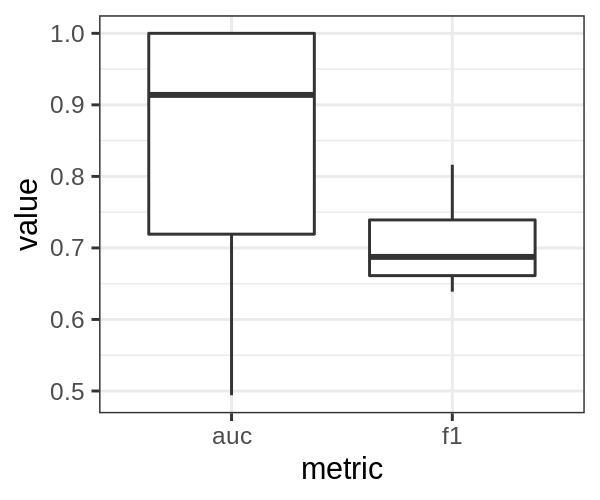

In [32]:
# plotting
p = res$measures.test %>%
    pivot_longer.(cols=c(-iter), names_to='metric', values_to='value') %>%
    ggplot(aes(metric, value)) +
    geom_boxplot() +
    theme_bw()  
p.dims(3,2.5)
plot(p)

In [33]:
#-- feature importance --#
merge_feat_imp = function(iter, feat_imp){
    res = feat_imp[[iter]]$res
    res$iter = iter
    return(res)  
}
feat_imp = res$models %>%
    lapply(function(x) getFeatureImportance(x)$res) %>%
    rbindlist(use.names=TRUE, idcol='cv_rep')
feat_imp

cv_rep,variable,importance
<int>,<chr>,<dbl>
1,Completeness,3.103457
1,Contamination,2.527876
⋮,⋮,⋮
5,num_genes_COG.V,1.810012
5,num_genes_COG.Z,1.608664


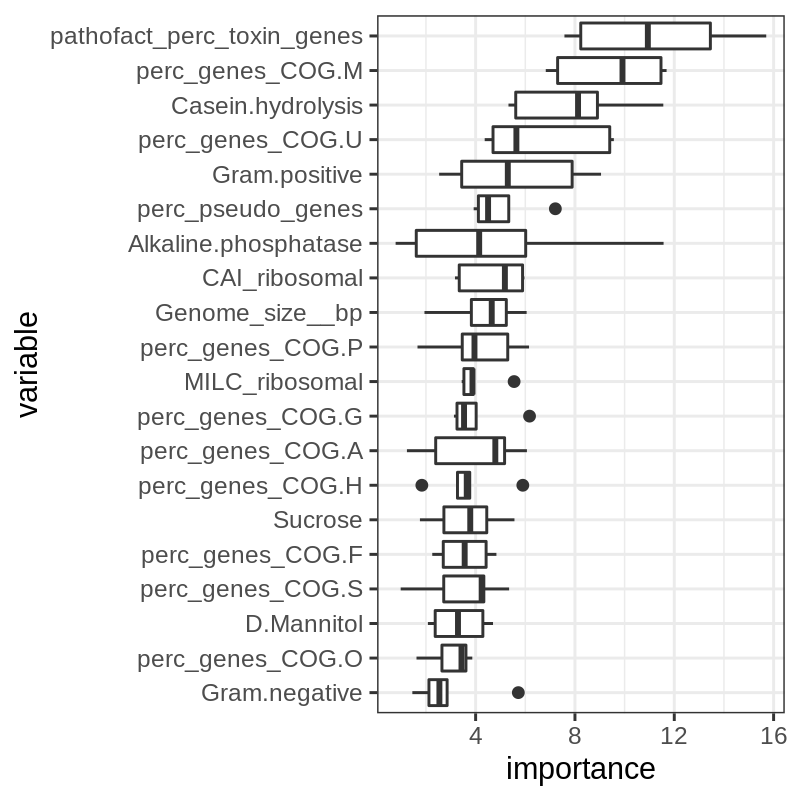

In [60]:
# plotting most important features (ranked mean importance)
x = feat_imp %>%
    mutate.(variable = gsub('num_', 'perc_', variable)) %>%
    summarize.(mean_imp = mean(importance),
               .by = c(variable)) %>%
    mutate.(rank = dense_rank(-mean_imp))

p = feat_imp %>%
    mutate.(variable = gsub('num_', 'perc_', variable)) %>%
    inner_join.(x, c('variable')) %>%
    filter.(rank <=20) %>%
    mutate.(variable = variable %>% reorder(-rank)) %>%
    ggplot(aes(variable, importance)) +
    geom_boxplot() +
    theme_bw() +
    coord_flip()
p.dims(4,4)
plot(p)

In [37]:
send_email('http://127.0.0.1:9709/notebooks/notebooks/function_HUBIF-TUK-CAM-KOR/04bb_ML_boruta_rf-cat_paco_genus-block_qval.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



# sessionInfo

In [36]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /tmp/global2/nyoungblut/code/HUBIF_cophylo/conda_envs/cophylo-ML/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] parallelMap_1.5.1   randomForest_4.6-14 mlr_2.19.0         
 [4] ParamHelpers_1.14   Boruta_7.0.0        clustermq_0.8.95.3 
 [7] LeyLabRMisc_0.2.1   tidytable_0.7.1     data.table_1.14.2  
[10] ggplot2_3.3.5       tidyr_1.2.0         dplyr_1.0.8        

loaded via a n